In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import seaborn as sns

In [ ]:
Сначала сделаем замену нечисловых значений в указанных столбцах на пустые значения. 

In [4]:

def replace_non_numeric_with_empty(file_path, columns):
    # Чтение Excel-файла
    df = pd.read_excel(file_path)

    # Замена нечисловых значений в указанных столбцах на пустые значения
    for column_name in columns:
        df[column_name] = pd.to_numeric(df[column_name], errors='coerce')

    # Сохранение изменений в новом Excel-файле
    output_file_path = file_path.replace('.xlsx', '_updated.xlsx')
    df.to_excel(output_file_path, index=False)
    return output_file_path
input_file = '/Users/nikitapesnak/Desktop/Новая папка 7/Книга123.xlsx'
columns_to_check = ['Maximum temperature', 'Minimum temperature', 'Average temperature', 'Effective temperature']
output_file = replace_non_numeric_with_empty(input_file, columns_to_check)
print(f"Файл с заменой нечисловых значений сохранен по пути: {output_file}")

Файл с заменой нечисловых значений сохранен по пути: /Users/nikitapesnak/Desktop/Новая папка 7/Книга123_updated.xlsx


In [ ]:
Функцию для визуализации распределение отсутствующих значений в наборе данных. 

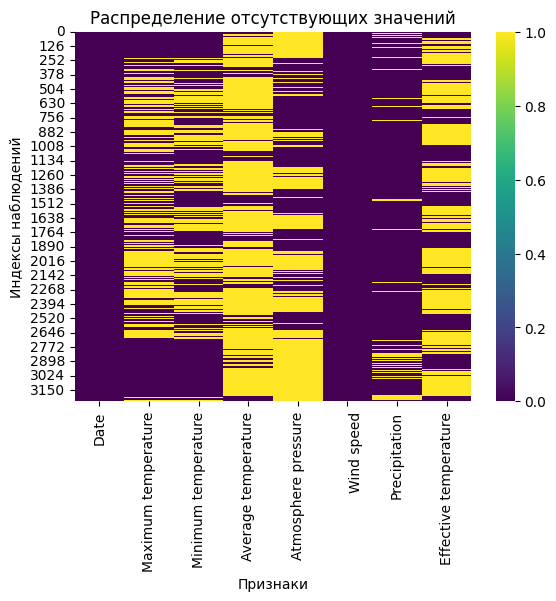

In [19]:

# Загрузка данных из файла Excel с помощью pandas
data=pd.read_excel('Applications/Chrome Apps.localized/Книга123_updated.xlsx')
# Создание тепловой карты отсутствующих значений
sns.heatmap(data.isnull(), cmap='viridis')
# Настройка внешнего вида
plt.title('Распределение отсутствующих значений')
plt.xlabel('Признаки')
plt.ylabel('Индексы наблюдений')
#Отображение графика
plt.show()


In [ ]:
Удаление отсутствующих значений для дальнейшей работы

In [ ]:
# Загрузка данных из файла Excel
df = pd.read_excel('Applications/Chrome Apps.localized/Книга123_updated.xlsx')
# Удаление пустых строк из определенных столбцов
columns_to_check = ['Maximum temperature', 'Minimum temperature', 'Average temperature', 'Effective temperature', 'Atmosphere pressure', 'Precipitation']
df.dropna(subset=columns_to_check, inplace=True)
# Сохранение обновленного DataFrame в новом файле Excel
df.to_excel('Applications/Chrome Apps.localized/Книга123_updated2.xlsx', index=False)


In [ ]:
Проверка или остались пустые ячейки с помощью тепловой карты

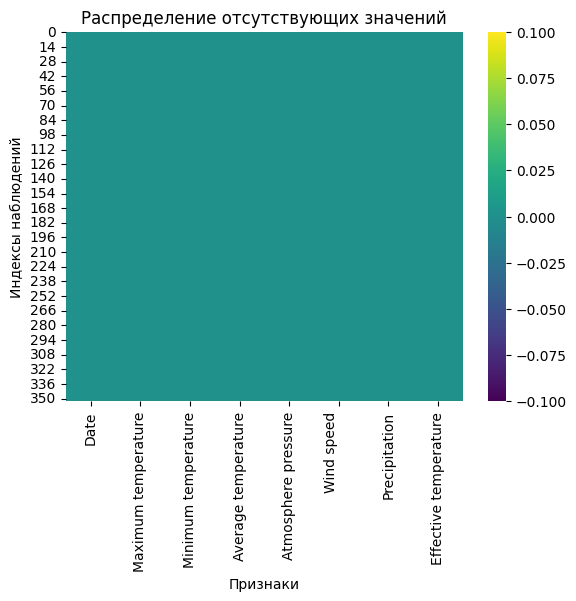

In [15]:
# Загрузка данных из файла Excel с помощью pandas
data=pd.read_excel('Applications/Chrome Apps.localized/Книга123_updated2.xlsx')
# Создание тепловой карты отсутствующих значений
sns.heatmap(data.isnull(), cmap='viridis')
# Настройка внешнего вида
plt.title('Распределение отсутствующих значений')
plt.xlabel('Признаки')
plt.ylabel('Индексы наблюдений')
#Отображение графика
plt.show()

In [ ]:
Визуализацию исходных данных с использованием графиков

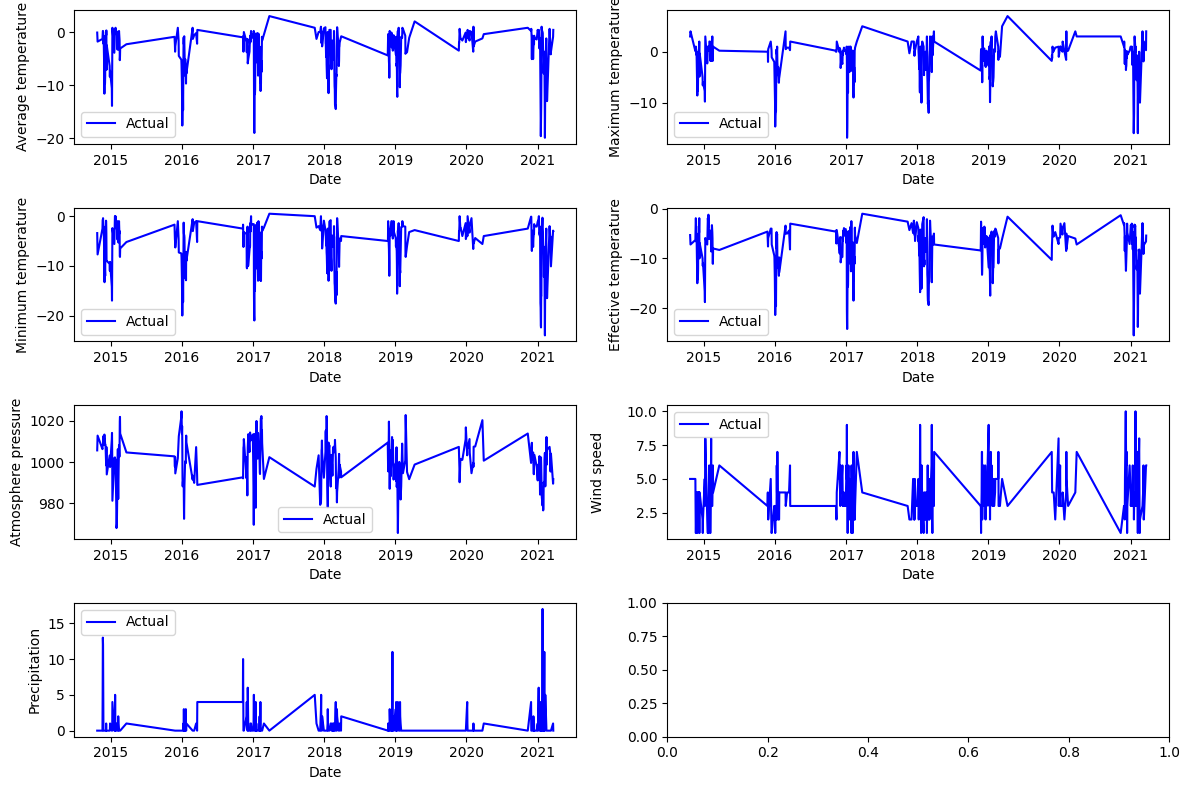

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
def display_results(data_file):
    # Чтение данных из файла
    df = pd.read_excel(data_file)
    # Преобразование столбца 'Date' в объект типа дата
    df['Date'] = pd.to_datetime(df['Date'])
    # Используемые столбцы для анализа
    columns = ['Average temperature', 'Maximum temperature', 'Minimum temperature', 'Effective temperature',
               'Atmosphere pressure', 'Wind speed\n', 'Precipitation']
    #Создание графиков размером 4x2
    fig, axs = plt.subplots(4, 2, figsize=(12, 8))
    # Выравнивает оси графиков в одномерный масси
    axs = axs.flatten()
    # Перебирает каждый столбец и строит график с использованием данных из столбца 'Date' и текущего столбца
    for i, column in enumerate(columns):
        axs[i].plot(df['Date'], df[column], color='blue', label='Actual')
        axs[i].set_xlabel('Date')
        axs[i].set_ylabel(column)
        axs[i].legend()
    plt.tight_layout()
    #Отображает графики на экране
    plt.show()

data_file = 'Applications/Chrome Apps.localized/Книга123_updated2.xlsx'
display_results(data_file)


In [ ]:
Генерации прогноза

22:20:47 - cmdstanpy - INFO - Chain [1] start processing
22:20:47 - cmdstanpy - INFO - Chain [1] done processing
22:20:47 - cmdstanpy - INFO - Chain [1] start processing
22:20:47 - cmdstanpy - INFO - Chain [1] done processing
22:20:47 - cmdstanpy - INFO - Chain [1] start processing
22:20:47 - cmdstanpy - INFO - Chain [1] done processing
22:20:47 - cmdstanpy - INFO - Chain [1] start processing
22:20:47 - cmdstanpy - INFO - Chain [1] done processing
22:20:47 - cmdstanpy - INFO - Chain [1] start processing
22:20:47 - cmdstanpy - INFO - Chain [1] done processing
22:20:47 - cmdstanpy - INFO - Chain [1] start processing
22:20:47 - cmdstanpy - INFO - Chain [1] done processing
22:20:47 - cmdstanpy - INFO - Chain [1] start processing
22:20:47 - cmdstanpy - INFO - Chain [1] done processing


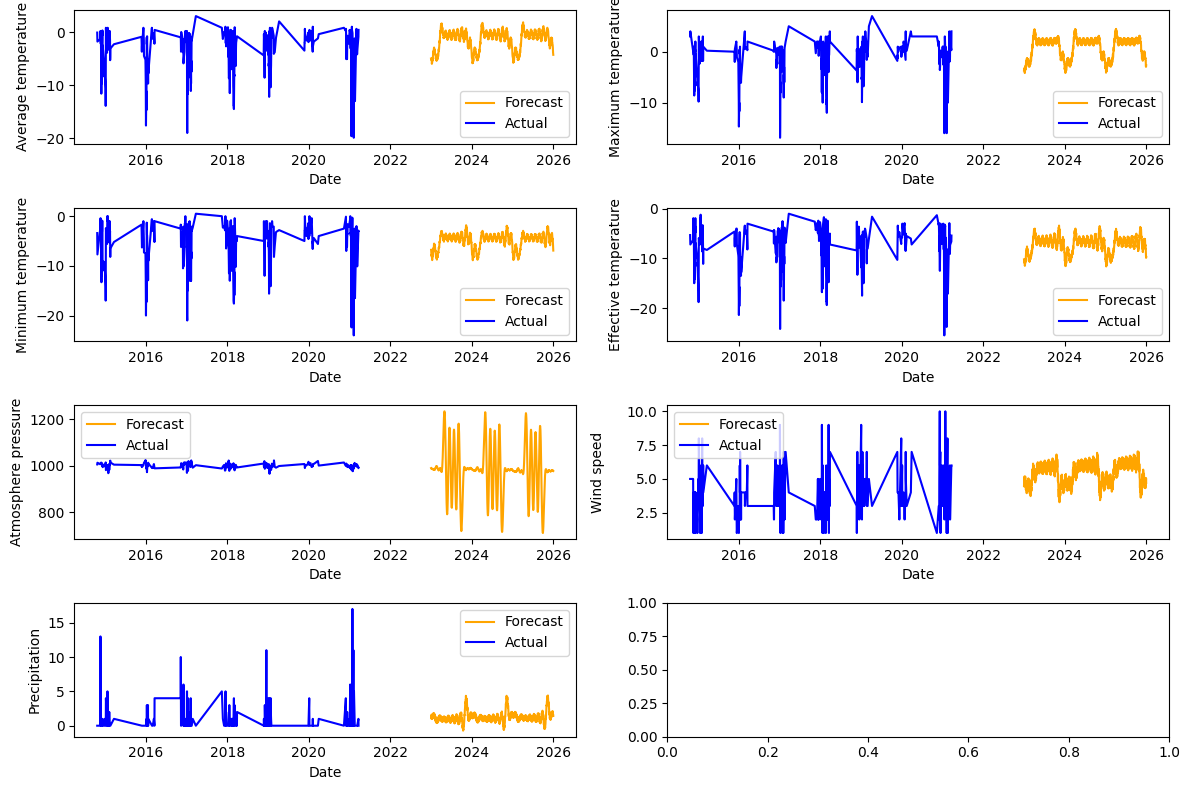

In [23]:
def generate_forecasts_and_plots(data_file):
    # Чтение данных из файла
    df = pd.read_excel(data_file)
    #Конвертация в тип данных даты.
    df['Date'] = pd.to_datetime(df['Date'])
    # Используемые столбцы для прогнозирования
    columns = ['Average temperature', 'Maximum temperature', 'Minimum temperature', 'Effective temperature',
               'Atmosphere pressure', 'Wind speed\n', 'Precipitation']
    # Создание и обучение моделей Prophet для каждого столбца
    models = {}
    for column in columns:
        model = Prophet()
        model.add_seasonality(name='yearly', period=365.25, fourier_order=10)
        df_train = df[['Date', column]]
        df_train = df_train.rename(columns={'Date': 'ds', column: 'y'})
        model.fit(df_train)
        models[column] = model
    # Создание фрейма для прогноза
    future = pd.DataFrame(pd.date_range(start='2023-01-01', end='2025-12-31'), columns=['ds'])
    #Создание графиков размером 4x2
    fig_forecast, axs_forecast = plt.subplots(4, 2, figsize=(12, 8))
    axs_forecast = axs_forecast.flatten()
    # Перебирает каждый столбец и строит график с использованием данных из столбца 'Date' и текущего столбца
    for i, column in enumerate(columns):
        model = models[column]
        forecast = model.predict(future)
        axs_forecast[i].plot(forecast['ds'], forecast['yhat'], color='orange', label='Forecast')
        axs_forecast[i].plot(df['Date'], df[column], color='blue', label='Actual')
        axs_forecast[i].set_xlabel('Date')
        axs_forecast[i].set_ylabel(column)
        axs_forecast[i].legend()
    plt.tight_layout()
    # Отображает графики на экране
    plt.show()

data_file = 'Applications/Chrome Apps.localized/Книга123_updated2.xlsx'
generate_forecasts_and_plots(data_file)